In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Automobile_cleaned1_dataset.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin1
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


In [4]:
## independent and dependent fetures
X=df.drop('mpg',axis=1)
y=df['mpg']

In [6]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin1
0,8,307.0,130.0,3504,12.0,70,2
1,8,350.0,165.0,3693,11.5,70,2
2,8,318.0,150.0,3436,11.0,70,2
3,8,304.0,150.0,3433,12.0,70,2
4,8,302.0,140.0,3449,10.5,70,2


In [7]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [8]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((298, 7), (100, 7), (298,), (100,))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-0.86564282, -0.93324137, -1.02041589, ..., -0.45458866,
         0.53837478,  0.7131373 ],
       [-0.86564282, -0.83481596, -0.25303563, ...,  0.30443371,
        -0.86158757, -0.57483189],
       [ 0.32862366,  0.06085531, -0.17081632, ..., -0.05700552,
        -1.70156498,  0.7131373 ],
       ...,
       [-0.86564282, -0.57890988, -0.22562919, ..., -0.31001297,
         0.53837478, -0.57483189],
       [-0.86564282, -1.02182425, -1.13004164, ...,  0.59358509,
         1.3783522 , -0.57483189],
       [-0.86564282, -0.94308392, -1.56854464, ...,  1.93091021,
        -0.86158757, -1.86280107]])

In [15]:
X_test_scaled

array([[-8.65642818e-01, -1.00213916e+00, -1.37669957e+00,
        -1.42147414e+00,  6.29729008e-01, -2.16101572e-02,
        -5.74831885e-01],
       [-8.65642818e-01, -7.16705463e-01, -6.64132196e-01,
        -4.24752967e-01,  1.06345608e+00,  1.65834467e+00,
         7.13137301e-01],
       [ 3.28623662e-01,  3.85659178e-01, -8.85970060e-02,
        -4.13945147e-01, -9.60603572e-01, -1.42157251e+00,
         7.13137301e-01],
       [ 1.52289014e+00,  1.23211774e+00,  1.28172487e+00,
         1.15438962e+00, -8.88315728e-01, -2.16101572e-02,
         7.13137301e-01],
       [ 1.52289014e+00,  1.23211774e+00,  1.28172487e+00,
         1.51104768e+00, -4.18444738e-01, -8.61587570e-01,
         7.13137301e-01],
       [-8.65642818e-01, -9.43083916e-01, -4.17474257e-01,
        -1.05520913e+00,  3.04433708e-01, -1.14158004e+00,
        -5.74831885e-01],
       [-8.65642818e-01, -5.19854634e-01, -3.07848507e-01,
        -1.36544434e-01,  2.68289786e-01,  1.65834467e+00,
         7.1313730

/tmp/ipykernel_800/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

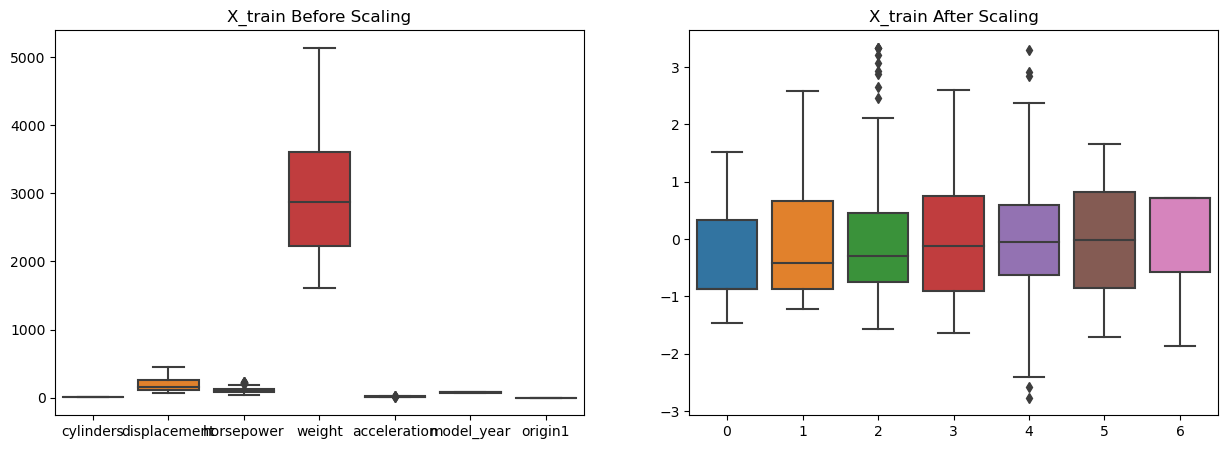

In [16]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.4891986025564328
R2 Score 0.8372332755452311


## Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.37874517078029
R2 Score 0.8357153251617062


## Ridge Regression model

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.4893936596900788
R2 Score 0.836711959612739


In [20]:
## Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.5573051506918323
R2 Score 0.8049841161828872


In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))